In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('superstore.csv')

In [3]:
data.head(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,1/7/2011,CA-2011-130813,...,19,Consumer,1/9/2011,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,1/21/2011,CA-2011-148614,...,19,Consumer,1/26/2011,Standard Class,0.94,California,Paper,2011,North America,4


In [4]:
data.shape

(51290, 27)

In [5]:
data.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [6]:
data['Order.Priority'].value_counts()

Order.Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

In [7]:
data['Order.Priority']=data['Order.Priority'].replace('high','High')

In [8]:
data['Order.Date'] = pd.to_datetime(data['Order.Date'])
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'])

In [9]:
data['Order.Year']= data['Order.Date'].dt.year

In [10]:
data['Order.Year'].value_counts()

Order.Year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

In [11]:
data['City'].value_counts()[:5]

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Name: count, dtype: int64

# Order Priority

In [12]:
data['Order.Priority'].value_counts()

Order.Priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

In [13]:
peiority_order = data['Order.Priority'].value_counts().sort_values(ascending =False).index

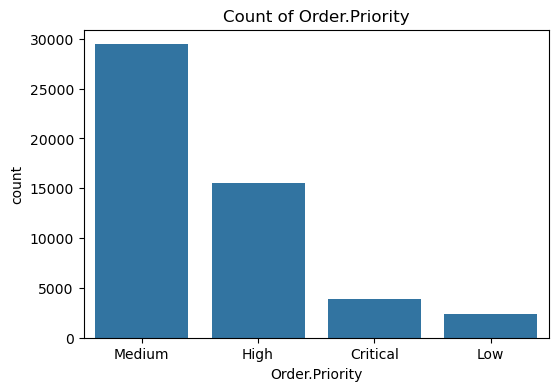

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Order.Priority',data=data,order=peiority_order)
plt.title("Count of Order.Priority")
plt.savefig("Count of Order.Priority.jpg")
plt.show()

# Category analysis

In [15]:
data['Category'].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

In [16]:
x = data['Category'].value_counts().index

In [17]:
y = data['Category'].value_counts().values

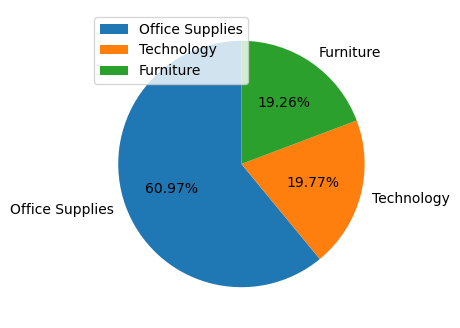

In [18]:
plt.figure(figsize=(6,4))
plt.pie(y,labels=x,startangle=90,autopct="%0.2f%%")
plt.legend(loc = 2)
plt.show()

In [19]:
data['Ship.Mode'].value_counts()

Ship.Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

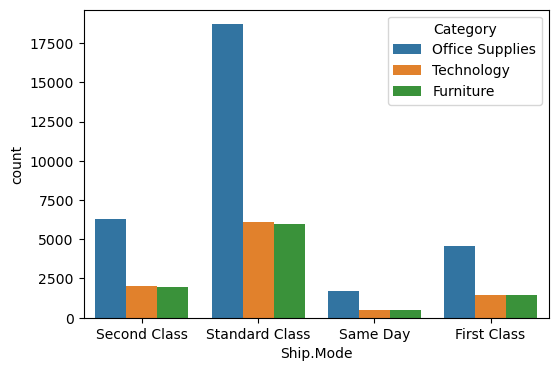

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ship.Mode",data=data,hue="Category")
plt.show()

# Customer Segment

In [21]:
data['Segment'].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [22]:
segment_order = data['Segment'].value_counts().sort_values(ascending = False).index

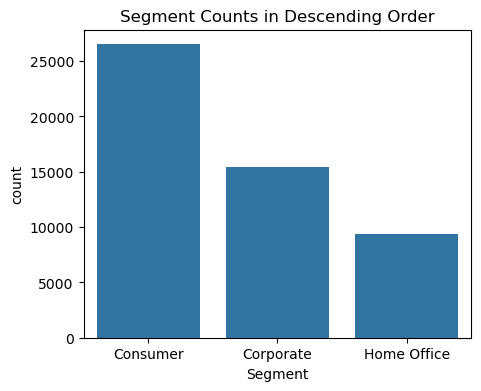

In [23]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Segment",data=data,order=segment_order)
plt.title('Segment Counts in Descending Order')
plt.show()

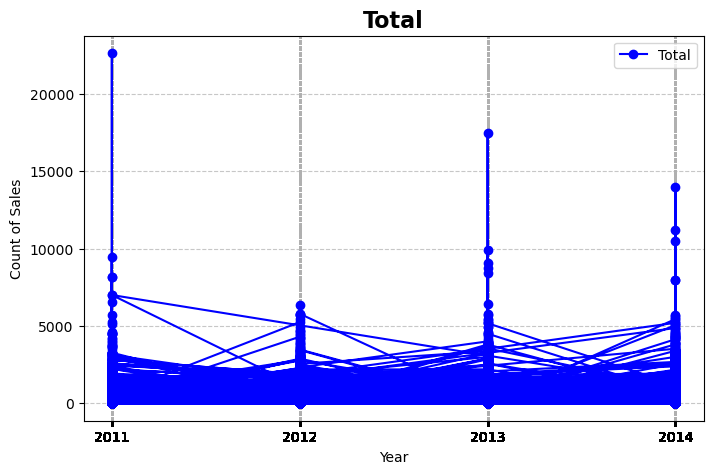

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(data['Order.Year'], data['Sales'], marker='o', linestyle='-', color='blue', label='Total')
plt.title('Total', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count of Sales')
plt.xticks(data['Order.Year'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

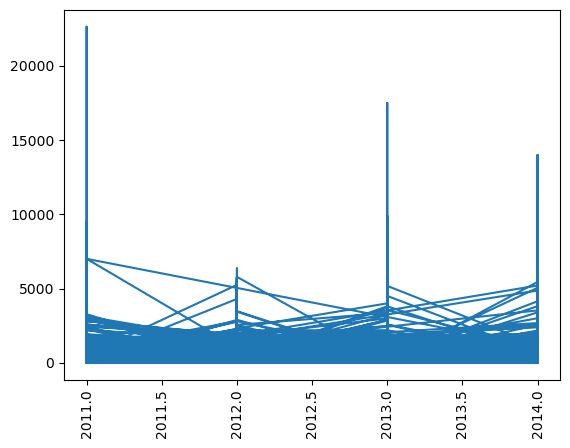

In [27]:
plt.plot(data['Order.Year'], data['Sales'])
plt.xticks(rotation='vertical')
plt.show()